Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Example 9.48

Example showing that independent sampling is required to build valid confidence intervals\
Topics and relevant videos: [Confidence intervals for proportions](https://www.youtube.com/watch?v=dlGl2dGNZSI)

Author: Carlos Fernandez-Granda\
Data source: https://www1.ncdc.noaa.gov/pub/data/uscrn/products/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
import seaborn as sns
from scipy import stats
from numpy import linalg as LA
from numpy.random import default_rng
import matplotlib
# matplotlib.rcParams['text.usetex'] = True
import urllib.request
import io

font_size = 15
font_size_legend = 15
font_size_ticks = 15

np.set_printoptions(precision=3)

# file_name_precipitation_2015 = "../data/weather/precipitation_2015.npy"
# precipitation_matrix_2015 = np.load(file_name_precipitation_2015)
# file_name_list = np.load('../data/weather/weather_station_names.npy')

# Raw GitHub URLs
url_precipitation_2015 = "https://raw.githubusercontent.com/cfgranda/ps4ds/main/data/weather/precipitation_2015.npy"
url_station_names = "https://raw.githubusercontent.com/cfgranda/ps4ds/main/data/weather/weather_station_names.npy"

# Load .npy files using BytesIO
with urllib.request.urlopen(url_precipitation_2015) as response:
    precipitation_matrix_2015 = np.load(io.BytesIO(response.read()))

with urllib.request.urlopen(url_station_names) as response:
    file_name_list = np.load(io.BytesIO(response.read()))

In [2]:
def process_name(x):
    x = x[14:]
    x = x[:-7]
    x = x.translate(str.maketrans('','','_1234567890'))
    return x[2:] + ", " + x[:2]

station = 99
print(process_name(file_name_list[station]))

CoosBay, OR


In [3]:
def remove_faulty_measurements(data,verbose):
    min_val = -100 
    for ind in range(len(data)):
        median = np.median(data[data > min_val])
        if data[ind] < min_val:
            if verbose:
                print(str(ind) + ": " + str(data[ind]))
            aux_ind = ind-1
            while aux_ind > 0:
                if data[aux_ind] > min_val:
                    data[ind] = median
                    if verbose:
                        print("entry " + str(aux_ind) + " changed to " + str(data[ind]))
                    break
                else:
                    ind -= 1
    return data

verbose = False
precipitation_aux_2015 = remove_faulty_measurements(precipitation_matrix_2015[:,station],verbose)
precipitation_2015 = np.zeros(len(precipitation_aux_2015))
precipitation_2015[precipitation_aux_2015 > 0] = 1

In [4]:
p_precipitation = np.sum(precipitation_2015) / len(precipitation_2015)
print("Probability of precipitation in 2015: "+str(round(p_precipitation,3)))

Probability of precipitation in 2015: 0.113


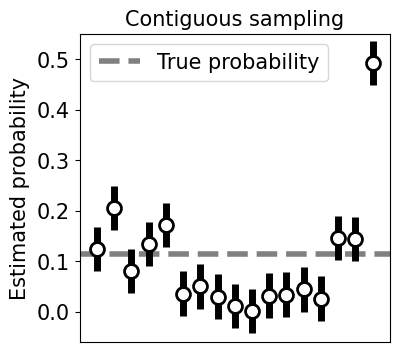

In [5]:
# 0.95 confidence intervals using 500 contiguous samples
n = 500
total = len(precipitation_2015)
n_samples = int(total/n)
x_min = -1
x_max = n_samples
y_min = -0.06
y_max = 0.55
sample_std = 0.5 # np.sqrt(p_precipitation*(1-p_precipitation))

plt.figure(figsize=(4,4))
plt.xticks([])
plt.yticks(fontsize=font_size_ticks) 
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.ylabel(r"Estimated probability",fontsize=font_size,labelpad=5)
plt.hlines(p_precipitation,x_min,x_max,lw=4,ls="dashed",color="gray",label="True probability")
for ind in range(n_samples):
    samples = precipitation_2015[ind*n:(ind+1)*n]
    estimated_p = np.sum(samples)/n
    Phi_inv = 1.96 # Inverse cdf of 1-0.05/2
    half_width = sample_std * Phi_inv / np.sqrt(n)
    l = estimated_p - half_width
    u = estimated_p + half_width
    plt.vlines(ind,l,u,lw=5,color="black")
    plt.plot(ind,estimated_p,"o",markersize=10,markeredgewidth=2,markerfacecolor = "white",markeredgecolor = "black")
plt.legend(fontsize=font_size,loc="upper left")
plt.title("Contiguous sampling",fontsize=font_size);

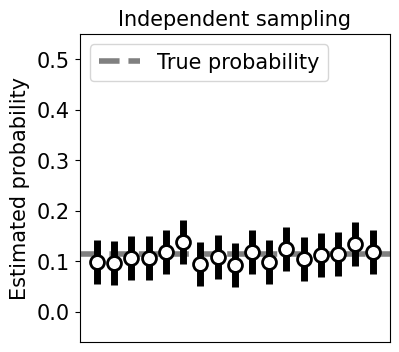

In [6]:
# 0.95 confidence intervals using 500 random independent samples
rng = default_rng(2021)

plt.figure(figsize=(4,4))
plt.xticks([])
plt.yticks(fontsize=font_size_ticks) 
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.ylabel(r"Estimated probability",fontsize=font_size,labelpad=5)
plt.hlines(p_precipitation,x_min,x_max,lw=4,ls="dashed",color="gray",label="True probability")
for ind in range(n_samples):
    samples = rng.choice(precipitation_2015,n,replace=True)
    estimated_p = np.sum(samples)/n
    Phi_inv = 1.96 # Inverse cdf of 1-0.05/2
    half_width = sample_std * Phi_inv / np.sqrt(n)
    l = estimated_p - half_width
    u = estimated_p + half_width
    plt.vlines(ind,l,u,lw=5,color="black")
    # plt.grid(True)
    plt.plot(ind,estimated_p,"o",markersize=10,markeredgewidth=2,markerfacecolor = "white",markeredgecolor = "black")
plt.legend(fontsize=font_size,loc="upper left")
plt.title("Independent sampling",fontsize=font_size);